## Script for making SI figures for Needham et al. 2022 GCB - FATES crown damage

In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))

In [2]:
### Low root N control
filename_in = 'V3/low_root_N_control_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)

LC_LEAF_MR = fin.variables['LEAF_MR'][:]
LC_FROOT_MR = fin.variables['FROOT_MR'][:]
LC_LIVECROOT_MR = fin.variables['LIVECROOT_MR'][:]
LC_LIVESTEM_MR = fin.variables['LIVESTEM_MR'][:]

LC_NPP_LEAF = fin.variables['NPP_LEAF']
LC_NPP_CROOT = fin.variables['NPP_CROOT']
LC_NPP_STEM = fin.variables['NPP_STEM']
LC_NPP_FROOT = fin.variables['NPP_FROOT']

fin.close()

In [3]:
### Root N ensemble
filename_in = 'V3/damage_Nstoich_ensemble_e1b5bd9_bf013ef_2021-09-02.h0.ensemble.sofar.nc'

fin = nc.netcdf_file(filename_in)
r_time = fin.variables['time'][:] / 365.
r_dmdntime = len(r_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)
cohort_height_bins = fin.variables['fates_levheight'][:]
nheightbins = len(cohort_height_bins)


D_LEAF_MR = fin.variables['LEAF_MR'][:]
D_FROOT_MR = fin.variables['FROOT_MR'][:]
D_LIVECROOT_MR = fin.variables['LIVECROOT_MR'][:]
D_LIVESTEM_MR = fin.variables['LIVESTEM_MR'][:]

D_NPP_LEAF = fin.variables['NPP_LEAF'][:]
D_NPP_CROOT = fin.variables['NPP_CROOT'][:]
D_NPP_STEM = fin.variables['NPP_STEM'][:]
D_NPP_FROOT = fin.variables['NPP_FROOT'][:]

D_N_M3_CDSC = fin.variables['M3_CDSC'][:]
D_N_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:]

D_AGB_SCLS = fin.variables['AGB_SCLS']

D_leaf_mr = np.mean(D_LEAF_MR[:,2400:,], axis=1)
D_froot_mr = np.mean(D_FROOT_MR[:,2400:,], axis=1)
D_croot_mr = np.mean(D_LIVECROOT_MR[:,2400:,], axis=1)
D_stem_mr = np.mean(D_LIVESTEM_MR[:,2400:,], axis=1)

D_leaf_gr = np.mean(D_NPP_LEAF[:,2400:,], axis=1) * 0.11
D_froot_gr = np.mean(D_NPP_FROOT[:,2400:,], axis=1)* 0.11
D_croot_gr = np.mean(D_NPP_CROOT[:,2400:,], axis=1)* 0.11
D_stem_gr = np.mean(D_NPP_STEM[:,2400:,], axis=1)* 0.11

D_leaf_r = D_leaf_mr + D_leaf_gr
D_froot_r = D_froot_mr + D_froot_gr
D_croot_r = D_croot_mr + D_croot_gr
D_stem_r = D_stem_mr + D_stem_gr


fin.close()

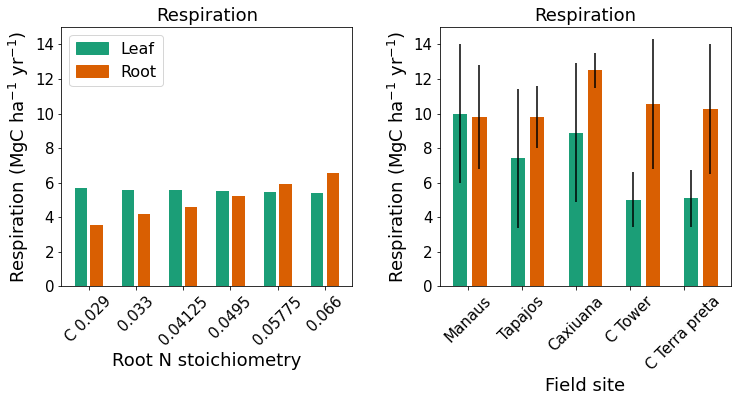

In [4]:
### Fig. S9
fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

leaf_mr = np.mean(D_LEAF_MR[:,2400:,], axis=1)
froot_mr = np.mean(D_FROOT_MR[:,2400:,], axis=1)
croot_mr = np.mean(D_LIVECROOT_MR[:,2400:,], axis=1)
stem_mr = np.mean(D_LIVESTEM_MR[:,2400:,], axis=1)

leaf_gr = np.mean(D_NPP_LEAF[:,2400:,], axis=1) * 0.11
froot_gr = np.mean(D_NPP_FROOT[:,2400:,], axis=1)* 0.11
croot_gr = np.mean(D_NPP_CROOT[:,2400:,], axis=1)* 0.11
stem_gr = np.mean(D_NPP_STEM[:,2400:,], axis=1)* 0.11

leaf_r = leaf_mr + leaf_gr
froot_r = froot_mr + froot_gr
croot_r = croot_mr + croot_gr
stem_r = stem_mr + stem_gr

cleaf_mr = np.mean(LC_LEAF_MR[2400:,], axis=0)
cfroot_mr = np.mean(LC_FROOT_MR[2400:,], axis=0)
ccroot_mr = np.mean(LC_LIVECROOT_MR[2400:,], axis=0)
cstem_mr = np.mean(LC_LIVESTEM_MR[2400:,], axis=0)

cleaf_gr = np.mean(LC_NPP_LEAF[2400:,], axis=0)* 0.11
cfroot_gr = np.mean(LC_NPP_FROOT[2400:,], axis=0)* 0.11
ccroot_gr = np.mean(LC_NPP_CROOT[2400:,], axis=0)* 0.11
cstem_gr = np.mean(LC_NPP_STEM[2400:,], axis=0)* 0.11

cleaf_r = cleaf_mr + cleaf_gr
cfroot_r = cfroot_mr + cfroot_gr
ccroot_r = ccroot_mr + ccroot_gr
cstem_r = cstem_mr + cstem_gr

ind = np.arange(0,18,1)

f1ax0.bar(ind[1], cleaf_r*10,  color = colormap[0])
f1ax0.bar(ind[2], (cfroot_r + ccroot_r + cstem_r)*10, 
          color = colormap[1])
f1ax0.bar(ind[4], leaf_r[0]*10,  color = colormap[0])
f1ax0.bar(ind[5], (froot_r[0] + croot_r[0] + stem_r[0])*10, 
          color = colormap[1])
f1ax0.bar(ind[7], leaf_r[1]*10,  color=colormap[0])
f1ax0.bar(ind[8], (froot_r[1] + croot_mr[1] + stem_r[1])*10, 
          color=colormap[1])
f1ax0.bar(ind[10], leaf_r[2]*10, color = colormap[0])
f1ax0.bar(ind[11], (froot_r[2] + croot_mr[2]+ stem_r[2])*10, 
          color = colormap[1])
f1ax0.bar(ind[13], leaf_r[3]*10,  color = colormap[0])
f1ax0.bar(ind[14], (froot_r[3] + croot_mr[3] + stem_r[3])*10, 
          color = colormap[1])
f1ax0.bar(ind[16], leaf_r[4]*10,  color = colormap[0])
f1ax0.bar(ind[17], (froot_r[4] + croot_r[4] + stem_r[4])*10, 
          color = colormap[1])

f1ax0.set_title(r'Respiration', fontsize = 18)
f1ax0.set_ylabel('Respiration (MgC ha$^{-1}$ yr$^{-1}$)', fontsize = 18)
f1ax0.set_xlabel('Root N stoichiometry', fontsize = 18)
f1ax0.set_xticks(np.array([1.5, 4.5, 7.5, 10.5, 13.5, 16.5]))
f1ax0.tick_params(labelsize=15)
f1ax0.set_xticklabels(['C 0.029', '0.033', '0.04125', '0.0495', '0.05775', '0.066'], rotation = 45)
f1ax0.set_ylim(0,15)

colors = {'Leaf':colormap[0],'Root':colormap[1]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ledg = f1ax0.legend(handles, labels, loc='upper left', prop={'size':16})

ind = np.linspace(0,15,15)

f1ax1.bar(ind[1], 10, label = 'Manaus', color = colormap[0], yerr = 4)
f1ax1.bar(ind[2], 9.8, label = 'Manaus', color = colormap[1], yerr = 3)
f1ax1.bar(ind[4], 7.4, label = 'Tapajos', color = colormap[0], yerr = 4)
f1ax1.bar(ind[5], 9.8, label = 'Tapajos', color = colormap[1], yerr = 1.8)
f1ax1.bar(ind[7], 8.9, label = 'Caxiuana', color = colormap[0], yerr = 4)
f1ax1.bar(ind[8], 12.5, label = 'Caxiuana', color = colormap[1], yerr = 1)
f1ax1.bar(ind[10], 5.02, label = 'Tower', color = colormap[0], yerr = 1.58)
f1ax1.bar(ind[11], 10.54, label = 'Tower', color = colormap[1], yerr = 3.76)
f1ax1.bar(ind[13], 5.09, label = 'Terra preta', color = colormap[0], yerr = 1.67)
f1ax1.bar(ind[14], 10.24, label = 'Terra preta', color = colormap[1], yerr = 3.76)

f1ax1.set_title(r'Respiration', fontsize = 18)
f1ax1.set_ylabel('Respiration (MgC ha$^{-1}$ yr$^{-1}$)', fontsize = 18)
f1ax1.set_xlabel('Field site', fontsize = 18)
f1ax1.set_xticks(np.array([1.5, 4.5, 7.5, 10.5, 13.5]))
f1ax1.tick_params(labelsize=15)
f1ax1.set_xticklabels(['Manaus', 'Tapajos', 'Caxiuana', 'C Tower', 'C Terra preta'], rotation = 45)
f1ax1.set_ylim(0,15)

plt.subplots_adjust(left=0.125, bottom=0.3, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.5)

plt.savefig("Figures_v3/root_n_stoich_model_obs.png", format = 'png', dpi = 300)

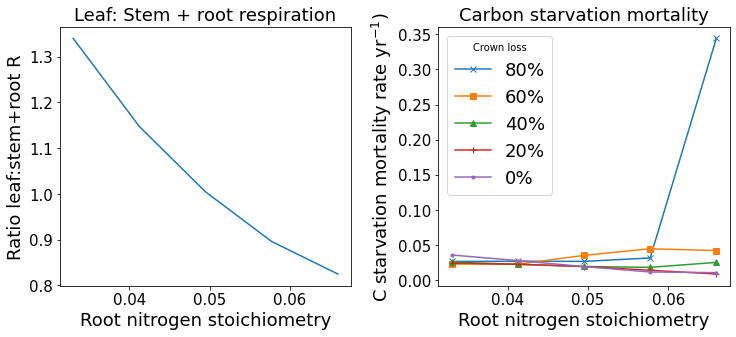

In [5]:
### Fig. S3
n_stoi_p1 = np.array([0.033, 0.04125, 0.0495, 0.05775, 0.066])

leaf_mr = np.mean(D_LEAF_MR[:,2400:,], axis=1)
froot_mr = np.mean(D_FROOT_MR[:,2400:,], axis=1)
croot_mr = np.mean(D_LIVECROOT_MR[:,2400:,], axis=1)
stem_mr = np.mean(D_LIVESTEM_MR[:,2400:,], axis=1)

leaf_gr = np.mean(D_NPP_LEAF[:,2400:,], axis=1) * 0.11
froot_gr = np.mean(D_NPP_FROOT[:,2400:,], axis=1)* 0.11
croot_gr = np.mean(D_NPP_CROOT[:,2400:,], axis=1)* 0.11
stem_gr = np.mean(D_NPP_STEM[:,2400:,], axis=1)* 0.11

leaf_r = leaf_mr + leaf_gr
froot_r = froot_mr + froot_gr
croot_r = croot_mr + croot_gr
stem_r = stem_mr + stem_gr

stem_root_r = froot_r + croot_r + stem_r

nensemble = 5

fig2, ((f2ax0, f2ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

f2ax0.plot(n_stoi_p1, leaf_r/stem_root_r)
f2ax0.set_title(r'Leaf: Stem + root respiration', fontsize = 18)
f2ax0.set_ylabel('Ratio leaf:stem+root R', fontsize = 18)
f2ax0.set_xlabel('Root nitrogen stoichiometry', fontsize = 18)
f2ax0.tick_params(labelsize=15)

m3 = np.delete(np.reshape(np.squeeze(D_N_M3_CDSC), 
                          (nensemble, r_dmdntime, ndamagebins, nsizebins)), 0,3)
npl = np.delete(np.reshape(np.squeeze(D_N_NPLANT_CDSC), 
                 (nensemble, r_dmdntime, ndamagebins, nsizebins)), 0,3)

m3r = np.sum(m3, axis=3)/np.sum(npl, axis=3)
m3r = np.mean(m3r[:,2400:,:], axis=1)

f2ax1.plot(n_stoi_p1, m3r[:,4], marker = 'x', label = '80%')
f2ax1.plot(n_stoi_p1, m3r[:,3], marker = 's', label = '60%')
f2ax1.plot(n_stoi_p1, m3r[:,2], marker = '^', label = '40%')
f2ax1.plot(n_stoi_p1, m3r[:,1], marker = '+', label = '20%')
f2ax1.plot(n_stoi_p1, m3r[:,0], marker = '.', label = '0%')

f2ax1.set_title(r'Carbon starvation mortality', fontsize = 18)
f2ax1.set_ylabel('C starvation mortality rate yr$^{-1}$)', fontsize = 18)
f2ax1.set_xlabel('Root nitrogen stoichiometry', fontsize = 18)
f2ax1.legend(prop={'size':18}, title = 'Crown loss')
f2ax1.tick_params(labelsize=15)

plt.subplots_adjust(left=0.125, bottom=0.3, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.5)

plt.savefig("Figures_v3/root_n_stoich.png", format = 'png', dpi = 300)

In [6]:
filename_in = 'V3/damage_Ccushion_ensemble_e1b5bd9_bf013ef_2021-09-02.h0.ensemble.sofar.nc'

fin = nc.netcdf_file(filename_in)
d_time = fin.variables['time'][:] / 365.
dmdntime = len(d_time)
print(dmdntime)

cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)
cohort_height_bins = fin.variables['fates_levheight'][:]
nheightbins = len(cohort_height_bins)

m3_cdsc = fin.variables['M3_CDSC'][:]
nplant_cdsc = fin.variables['NPLANT_CDSC'][:]

nensemble = 11

fin.close()

6000


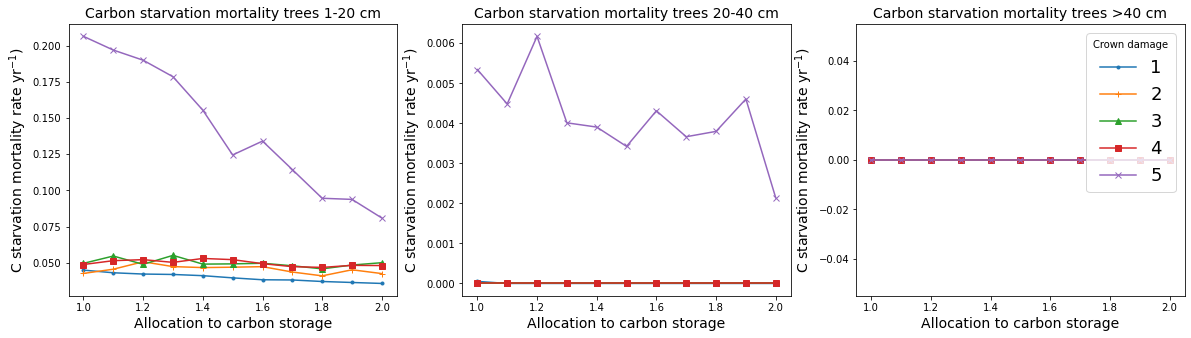

In [7]:
### Fig. S8

m3 = np.delete(np.reshape(np.squeeze(m3_cdsc), 
                          (nensemble, dmdntime, ndamagebins, nsizebins)), 0,3)
npl = np.delete(np.reshape(np.squeeze(nplant_cdsc), 
                 (nensemble, dmdntime, ndamagebins, nsizebins)), 0,3)

# 1-20 cm
mort_rate1 = np.sum(m3[:,:,:,0:5], axis=3)/np.sum(npl[:,:,:,0:5], axis=3)
mort_rate1 = np.mean(mort_rate1[:,4800:,:], axis=1)
# 20-40 cm
mort_rate2 = np.sum(m3[:,:,:,5:9], axis=3)/np.sum(npl[:,:,:,5:9], axis=3)
mort_rate2 = np.mean(mort_rate2[:,4800:,:], axis=1)
# 40-60 cm
mort_rate3 = np.sum(m3[:,:,:,9:], axis=3)/np.sum(npl[:,:,:,9:], axis=3)
mort_rate3 = np.mean(mort_rate3[:,4800:,:], axis=1)

fig1, ((f1ax0, f1ax1, f1ax2)) = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

c_cushion = np.linspace(1.0, 2.0, num= 11)

f1ax0.plot(c_cushion, mort_rate1[:,0], marker = '.', label = '1')
f1ax0.plot(c_cushion, mort_rate1[:,1], marker = '+', label = '2')
f1ax0.plot(c_cushion, mort_rate1[:,2], marker = '^', label = '3')
f1ax0.plot(c_cushion, mort_rate1[:,3], marker = 's', label = '4')
f1ax0.plot(c_cushion, mort_rate1[:,4], marker = 'x', label = '5')
f1ax0.set_title(r'Carbon starvation mortality trees 1-20 cm', fontsize = 14)
f1ax0.set_ylabel('C starvation mortality rate yr$^{-1}$)', fontsize = 14)
f1ax0.set_xlabel('Allocation to carbon storage', fontsize = 14)

f1ax1.plot(c_cushion, mort_rate2[:,0], marker = '.', label = '1')
f1ax1.plot(c_cushion, mort_rate2[:,1], marker = '+', label = '2')
f1ax1.plot(c_cushion, mort_rate2[:,2], marker = '^', label = '3')
f1ax1.plot(c_cushion, mort_rate2[:,3], marker = 's', label = '4')
f1ax1.plot(c_cushion, mort_rate2[:,4], marker = 'x', label = '5')
f1ax1.set_title(r'Carbon starvation mortality trees 20-40 cm', fontsize = 14)
f1ax1.set_ylabel('C starvation mortality rate yr$^{-1}$)', fontsize = 14)
f1ax1.set_xlabel('Allocation to carbon storage', fontsize = 14)

f1ax2.plot(c_cushion, mort_rate3[:,0], marker = '.', label = '1')
f1ax2.plot(c_cushion, mort_rate3[:,1], marker = '+', label = '2')
f1ax2.plot(c_cushion, mort_rate3[:,2], marker = '^', label = '3')
f1ax2.plot(c_cushion, mort_rate3[:,3], marker = 's', label = '4')
f1ax2.plot(c_cushion, mort_rate3[:,4], marker = 'x', label = '5')
f1ax2.set_title(r'Carbon starvation mortality trees >40 cm', fontsize = 14)
f1ax2.set_ylabel('C starvation mortality rate yr$^{-1}$)', fontsize = 14)
f1ax2.set_xlabel('Allocation to carbon storage', fontsize = 14)
f1ax2.legend(prop={'size':18}, title = 'Crown damage')

plt.savefig("Figures_v3/Ccushion_cstarv_sens.png", format = 'png', dpi = 300)


In [8]:
### Low root N damage off
filename_in = 'V3/low_root_N_control_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
d_time = fin.variables['time'][:] / 365.
dmdntime = len(d_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)

print(dmdntime)
print(patch_age_bins)

BIOMASS = fin.variables['ED_biomass'][:,:]
AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
NPP = fin.variables['NPP'][:,:]
BIOMASS = fin.variables['ED_biomass'][:,:]
NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
GPP = fin.variables['GPP'][:,:]

NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']


ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

fin.close()

6000
[ 0.  1.  2.  5. 10. 20. 50.]


In [9]:
### Low root N damage only 
filename_in = 'V3/low_root_N_damageonly_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v1d_time = fin.variables['time'][:] / 365.
v1dmdntime = len(v1d_time)

v1_BIOMASS = fin.variables['ED_biomass'][:,:]
v1_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v1_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v1_NPP = fin.variables['NPP'][:,:]
v1_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v1_GPP = fin.variables['GPP'][:,:]

v1_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v1_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v1_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v1_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v1_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]
v1_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
v1_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

v1_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:]
v1_M3_MORTALITY_UNDERSTORY_CDSC= fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:]
v1_MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
v1_MORTALITY_UNDERSTORY_CDPF= fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]


v1_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v1_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v1_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v1_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v1_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v1_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v1_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v1_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v1_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v1_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v1_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v1_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v1_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v1_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v1_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]
v1_DDBH_CANOPY_CDPF = fin.variables['DDBH_CANOPY_CDPF'][:]
v1_DDBH_UNDERSTORY_CDPF = fin.variables['DDBH_UNDERSTORY_CDPF'][:]
v1_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
v1_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]



v1_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]


v1_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v1_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v1_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']


fin.close()

In [10]:
# Low root N mortality only 
filename_in = 'V3/low_root_N_mort_only_e1b5bd9_ef845c8_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v2d_time = fin.variables['time'][:] / 365.
v2dmdntime = len(v2d_time)

v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v2_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v2_NPP = fin.variables['NPP'][:,:]
v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v2_GPP = fin.variables['GPP'][:,:]

v2_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v2_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v2_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v2_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v2_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v2_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v2_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v2_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v2_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v2_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v2_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v2_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v2_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v2_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v2_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v2_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v2_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v2_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v2_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v2_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v2_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v2_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v2_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v2_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v2_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v2_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v2_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']


fin.close()

In [11]:
# Low root N damage plus mortality 
filename_in = 'V3/low_root_N_damage_mort_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v3d_time = fin.variables['time'][:] / 365.
v3dmdntime = len(v3d_time)

v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v3_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v3_NPP = fin.variables['NPP'][:,:]
v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v3_GPP = fin.variables['GPP'][:,:]

v3_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v3_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v3_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v3_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v3_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v3_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v3_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v3_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v3_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v3_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v3_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v3_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v3_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v3_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v3_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v3_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v3_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v3_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v3_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v3_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v3_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v3_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v3_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v3_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v3_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v3_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v3_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']

fin.close()

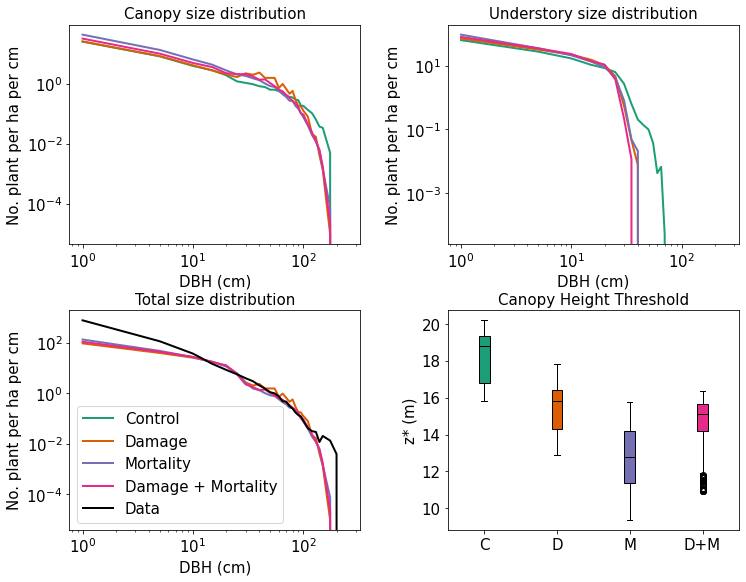

In [12]:
### Fig. S4 
fig5, ((f5ax0, f5ax1), (f5ax2, f5ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(12,9))

cohort_size_bins_ex = np.append(cohort_size_bins,300)
bins = np.diff(cohort_size_bins_ex)

a = np.squeeze(v1_NPLANT_CANOPY_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v2_NPLANT_CANOPY_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_CANOPY_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
       
# and the control    
CONTROL = np.squeeze(NPLANT_CANOPY_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[4800:,:],axis=0) 
CONTROL = CONTROL/bins[1:]

f5ax0.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
            color = colormap[0])
f5ax0.plot(cohort_size_bins_ex[1:-1], a, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax0.plot(cohort_size_bins_ex[1:-1], b, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax0.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])

f5ax0.set_title(r'Canopy size distribution', fontsize = 15)
f5ax0.set_xlabel('DBH (cm)', fontsize = 15)
f5ax0.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax0.tick_params(labelsize=15)
f5ax0.set_yscale('log')
f5ax0.set_xscale('log')


a = np.squeeze(v1_NPLANT_UNDERSTORY_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v2_NPLANT_UNDERSTORY_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_UNDERSTORY_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
              
# and the control    
CONTROL = np.squeeze(NPLANT_UNDERSTORY_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[4800:,:],axis=0) 
CONTROL = CONTROL/bins[1:]


f5ax1.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
              color = colormap[0])
f5ax1.plot(cohort_size_bins_ex[1:-1], a, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax1.plot(cohort_size_bins_ex[1:-1], b, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax1.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])

f5ax1.set_title(r'Understory size distribution', fontsize = 15)
f5ax1.set_xlabel('DBH (cm)', fontsize = 15)
f5ax1.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax1.tick_params(labelsize=15)
f5ax1.set_yscale('log')
f5ax1.set_xscale('log')

with open("size_dist.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    next(reader, None)  # skip the headers
    data_read = [row for row in reader]

data_read = [float(x[1]) for x in data_read]

a = np.squeeze(v2_NPLANT_SCLS[:,1:,:])
a = np.mean(a[4800:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(v1_NPLANT_SCLS[:,1:,:])
b = np.mean(b[4800:,:],axis=0)  
b = b/bins[1:]

c = np.squeeze(v3_NPLANT_SCLS[:,1:,:])
c = np.mean(c[4800:,:],axis=0)  
c = c/bins[1:]
   
# and the control    
CONTROL = np.squeeze(NPLANT_SCLS[:,1:,:])
CONTROL = np.mean(CONTROL[48000:,:],axis=0) 
CONTROL = CONTROL/bins[1:]


f5ax2.plot(cohort_size_bins_ex[1:-1], CONTROL, label = 'Control', linewidth = 2, 
            color = colormap[0])
f5ax2.plot(cohort_size_bins_ex[1:-1], b, label = 'Damage', linewidth = 2, color=colormap[1])
f5ax2.plot(cohort_size_bins_ex[1:-1], a, label = 'Mortality', linewidth = 2, color=colormap[2])
f5ax2.plot(cohort_size_bins_ex[1:-1], c, label = 'Damage + Mortality', linewidth = 2, color=colormap[3])
f5ax2.plot(cohort_size_bins_ex[1:-1], data_read, label = 'Data', linewidth = 2, color = 'black')   
f5ax2.set_title(r'Total size distribution', fontsize = 15)
f5ax2.set_xlabel('DBH (cm)', fontsize = 15)
f5ax2.set_ylabel('No. plant per ha per cm', fontsize = 15)
f5ax2.tick_params(labelsize=15)
f5ax2.set_yscale('log')
f5ax2.set_xscale('log')
f5ax2.legend(prop={'size': 15})


z = ZSTAR_BY_AGE
z1 = v1_ZSTAR_BY_AGE
z2 = v2_ZSTAR_BY_AGE
z3 = v3_ZSTAR_BY_AGE

data = np.vstack((np.squeeze(z[4800:,6,:]), np.squeeze(z1[4800:,6,:]), np.squeeze(z2[4800:,6,:]), np.squeeze(z3[4800:,6,:])))

box1 = f5ax3.boxplot(data[0,:], positions=[1], patch_artist=True,
            boxprops=dict(facecolor=colormap[0]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[1,:], positions=[2], patch_artist=True,
            boxprops=dict(facecolor=colormap[1]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[2,:], positions=[3], patch_artist=True,
            boxprops=dict(facecolor=colormap[2]), 
            medianprops=dict(color='black'))
box1 = f5ax3.boxplot(data[3,:], positions=[4], patch_artist=True,
            boxprops=dict(facecolor=colormap[3]), 
            medianprops=dict(color='black'))
f5ax3.set_ylabel(r'z* (m)', fontsize=15)
f5ax3.set_title('Canopy Height Threshold', fontsize=15)
f5ax3.tick_params(labelsize=15)
f5ax3.set_xticklabels(['C', 'D', 'M', 'D+M'])
plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

  
plt.savefig("Figures_v3/size_dists_canopy_understory_old.png", format = 'png', dpi = 300)

In [13]:
### Two PFT simulation 
filename_in = 'V3/low_root_N_damage_two_pfts_stoichastic_e1b5bd9_bf013ef_2021-09-10.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
d2_time = fin.variables['time'][:] / 365.
dmdn2time = len(d2_time)

BA_SCPF = fin.variables['ED_biomass'][:]
AGB_SCPF = fin.variables['AGB_SCPF'][:]
NPP_SCPF = fin.variables['NPP_SCPF'][:]
GPP_SCPF = fin.variables['GPP'][:]

DDBH_CANOPY_SCPF = fin.variables['DDBH_CANOPY_SCPF'][:]
DDBH_UNDERSTORY_SCPF = fin.variables['DDBH_UNDERSTORY_SCPF'][:]
DDBH_CANOPY_CDPF = fin.variables['DDBH_CANOPY_CDPF'][:]
DDBH_UNDERSTORY_CDPF = fin.variables['DDBH_UNDERSTORY_CDPF'][:]


NPLANT_SCPF = fin.variables['NPLANT_SCPF'][:]
NPLANT_CANOPY_SCPF = fin.variables['NPLANT_CANOPY_SCPF'][:]
NPLANT_UNDERSTORY_SCPF = fin.variables['NPLANT_UNDERSTORY_SCPF'][:]
NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

MORTALITY_CANOPY_SCPF = fin.variables['MORTALITY_CANOPY_SCPF'][:]
MORTALITY_UNDERSTORY_SCPF = fin.variables['MORTALITY_UNDERSTORY_SCPF'][:]
MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
MORTALITY_UNDERSTORY_CDPF = fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]

fin.close()

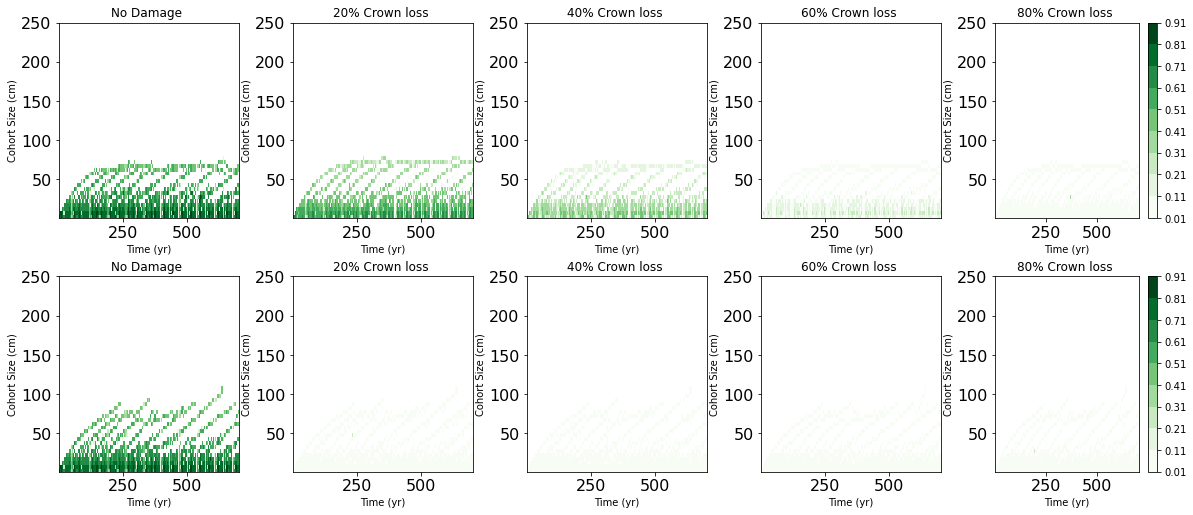

In [14]:
### Fig. S6 
fig7, ((f7ax0,f7ax1,f7ax2,f7ax3,f7ax4), (f7ax5,f7ax6,f7ax7,f7ax8,f7ax9))=plt.subplots(nrows=2,ncols=5, figsize=(20,8))

npl = np.reshape(NPLANT_CANOPY_CDPF, (dmdn2time, 2, ndamagebins, nsizebins))
ddbh = np.reshape(DDBH_CANOPY_CDPF, (dmdn2time, 2, ndamagebins, nsizebins))
npl1 = npl[:,0,:,1:]
npl2 = npl[:,1,:,1:]
ddbh1 = ddbh[:,0,:,1:]
ddbh2 = ddbh[:,1,:,1:]


levels = np.arange(0.01,1,0.1) 
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,0,:]/npl1[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax0.set_title(r'No Damage ')
f7ax0.set_xlabel('Time (yr)')
f7ax0.set_ylabel('Cohort Size (cm)')
f7ax0.tick_params(labelsize=16)

im = f7ax1.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,1,:]/npl1[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax1.set_title(r'20% Crown loss ')
f7ax1.set_xlabel('Time (yr)')
f7ax1.set_ylabel('Cohort Size (cm)')
f7ax1.tick_params(labelsize=16)


im = f7ax2.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,2,:]/npl1[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax2.set_title(r'40% Crown loss ')
f7ax2.set_xlabel('Time (yr)')
f7ax2.set_ylabel('Cohort Size (cm)')
f7ax2.tick_params(labelsize=16)

im = f7ax3.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,3,:]/npl1[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax3.set_title(r'60% Crown loss ')
f7ax3.set_xlabel('Time (yr)')
f7ax3.set_ylabel('Cohort Size (cm)')
f7ax3.tick_params(labelsize=16)


im = f7ax4.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,4,:]/npl1[:,4,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax4.set_title(r'80% Crown loss ')
f7ax4.set_xlabel('Time (yr)')
f7ax4.set_ylabel('Cohort Size (cm)')
f7ax4.tick_params(labelsize=16)
fig7.colorbar(im, ax=f7ax4)


im = f7ax5.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,0,:]/npl2[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax5.set_title(r'No Damage ')
f7ax5.set_xlabel('Time (yr)')
f7ax5.set_ylabel('Cohort Size (cm)')
f7ax5.tick_params(labelsize=16)

im = f7ax6.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,1,:]/npl2[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax6.set_title(r'20% Crown loss ')
f7ax6.set_xlabel('Time (yr)')
f7ax6.set_ylabel('Cohort Size (cm)')
f7ax6.tick_params(labelsize=16)


im = f7ax7.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,2,:]/npl2[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax7.set_title(r'40% Crown loss ')
f7ax7.set_xlabel('Time (yr)')
f7ax7.set_ylabel('Cohort Size (cm)')
f7ax7.tick_params(labelsize=16)

im = f7ax8.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,3,:]/npl2[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax8.set_title(r'60% Crown loss ')
f7ax8.set_xlabel('Time (yr)')
f7ax8.set_ylabel('Cohort Size (cm)')
f7ax8.tick_params(labelsize=16)


im = f7ax9.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,4,:]/npl2[:,4,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax9.set_title(r'80% Crown loss ')
f7ax9.set_xlabel('Time (yr)')
f7ax9.set_ylabel('Cohort Size (cm)')
f7ax9.tick_params(labelsize=16)
fig7.colorbar(im, ax=f7ax9)

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures_v3/growth_by_damage_recoveryVno.png", format = 'png', dpi = 300)

In [15]:
# Damage off 
filename_in = 'V3/elm_fates_bci_damage_off.Eac53ccb80b-F78b4f1a6.2022-03-31.elm.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)

d_time = fin.variables['time'][:] / 365.
dmdntime = len(d_time)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)

v1_NCOHORT = fin.variables['FATES_NCOHORTS'][:,:]
v1_NPLANT_SZ = fin.variables['FATES_NPLANT_SZ'][:]
v1_AGB_SCLS = fin.variables['FATES_VEGC_ABOVEGROUND_SZ'][:,:,:]
v1_BIOMASS = fin.variables['FATES_VEGC_ABOVEGROUND'][:,:]
v1_NPP_SZPF = fin.variables['FATES_NPP_SZPF'][:,:,:]
v1_ZSTAR_BY_AGE = fin.variables['FATES_ZSTAR_AP'][:]

fin.close()

In [16]:
### Two damage bins
filename_in = 'V3/elm_fates_bci_2_damagebins.Eac53ccb80b-F8f994c29.2022-04-19.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
d_time_2 = fin.variables['time'][:] / 365.
dmdntime_2 = len(d_time_2)
two_ndamagebins = 2
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)

v2_NCOHORT = fin.variables['FATES_NCOHORTS'][:,:]
v2_NPLANT_SZ = fin.variables['FATES_NPLANT_SZ'][:]
v2_AGB_SCLS = fin.variables['FATES_VEGC_ABOVEGROUND_SZ'][:,:,:]
v2_BIOMASS = fin.variables['FATES_VEGC_ABOVEGROUND'][:,:]
v2_NPP_SZPF = fin.variables['FATES_NPP_SZPF'][:,:,:]
v2_ZSTAR_BY_AGE = fin.variables['FATES_ZSTAR_AP'][:]

fin.close()

In [17]:
### Three damage bins
filename_in = 'V3/elm_fates_bci_3_damagebins.Eac53ccb80b-F8f994c29.2022-04-19.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
d_time_3 = fin.variables['time'][:] / 365.
dmdntime_3 = len(d_time_3)
three_ndamagebins = 3

v3_NCOHORT = fin.variables['FATES_NCOHORTS'][:,:]
v3_NPLANT_SZ = fin.variables['FATES_NPLANT_SZ'][:]
v3_AGB_SCLS = fin.variables['FATES_VEGC_ABOVEGROUND_SZ'][:,:,:]
v3_BIOMASS = fin.variables['FATES_VEGC_ABOVEGROUND'][:,:]
v3_NPP_SZPF = fin.variables['FATES_NPP_SZPF'][:,:,:]
v3_ZSTAR_BY_AGE = fin.variables['FATES_ZSTAR_AP'][:]

fin.close()

In [18]:
### Four damage bins
filename_in = 'V3/elm_fates_bci_4_damagebins.Eac53ccb80b-F8f994c29.2022-04-19.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
d_time_4 = fin.variables['time'][:] / 365.
dmdntime_4 = len(d_time_4)
found_ndamagebins = 4

v4_NCOHORT = fin.variables['FATES_NCOHORTS'][:,:]
v4_AGB_SCLS = fin.variables['FATES_VEGC_ABOVEGROUND_SZ'][:,:,:]
v4_NPLANT_SZ = fin.variables['FATES_NPLANT_SZ'][:]
v4_BIOMASS = fin.variables['FATES_VEGC_ABOVEGROUND'][:,:]
v4_NPP_SZPF = fin.variables['FATES_NPP_SZPF'][:,:,:]
v4_ZSTAR_BY_AGE = fin.variables['FATES_ZSTAR_AP'][:]

fin.close()

In [19]:
### Five damage bins
filename_in = 'V3/elm_fates_bci_5_damagebins.Eac53ccb80b-F8f994c29.2022-04-19.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
five_ndamagebins = 5
d_time_5 = fin.variables['time'][:] / 365.
dmdntime_5 = len(d_time_5)

v5_NCOHORT = fin.variables['FATES_NCOHORTS'][:,:]
v5_NPLANT_SZ = fin.variables['FATES_NPLANT_SZ'][:]
v5_AGB_SCLS = fin.variables['FATES_VEGC_ABOVEGROUND_SZ'][:,:,:]
v5_BIOMASS = fin.variables['FATES_VEGC_ABOVEGROUND'][:,:]
v5_NPP_SZPF = fin.variables['FATES_NPP_SZPF'][:,:,:]
v5_ZSTAR_BY_AGE = fin.variables['FATES_ZSTAR_AP'][:]

fin.close()

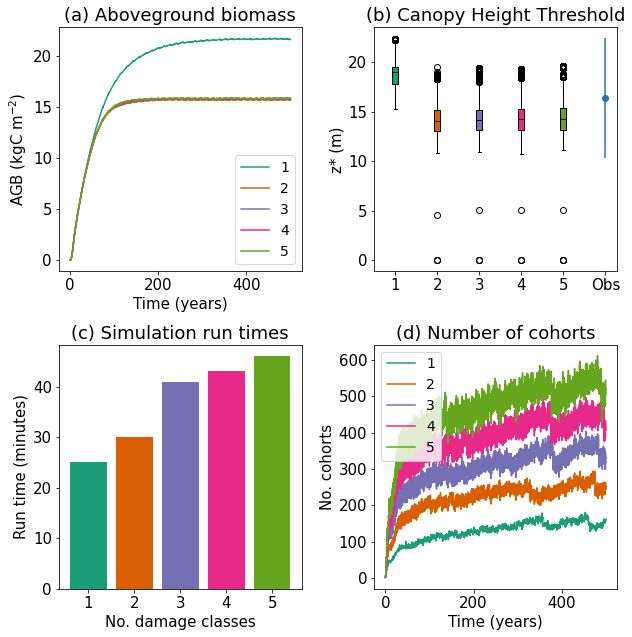

In [20]:
## Fig. S7
fig4, ((f4ax0, f4ax1), (f4ax2, f4ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

## AGB

f4ax0.plot(d_time, np.sum(v1_AGB_SCLS, axis=1), label = '1', color=colormap[0])
f4ax0.plot(d_time_2, np.sum(v2_AGB_SCLS, axis = 1), label = '2', color=colormap[1])
f4ax0.plot(d_time_3, np.sum(v3_AGB_SCLS, axis = 1), label = '3', color=colormap[2])
f4ax0.plot(d_time_4, np.sum(v4_AGB_SCLS, axis = 1), label = '4', color=colormap[3])
f4ax0.plot(d_time_5, np.sum(v5_AGB_SCLS, axis = 1), label = '5', color=colormap[4])

f4ax0.set_title(r'(a) Aboveground biomass', fontsize = 18)
f4ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f4ax0.set_xlabel('Time (years)', fontsize=15)
f4ax0.tick_params(labelsize=15)
f4ax0.legend(prop={'size':14})


### Z*
z1 = v1_ZSTAR_BY_AGE
z2 = v2_ZSTAR_BY_AGE
z3 = v3_ZSTAR_BY_AGE
z4 = v4_ZSTAR_BY_AGE
z5 = v5_ZSTAR_BY_AGE

z1all = np.squeeze(np.ravel(z1[600:,6:,:]))
z2all = np.squeeze(np.ravel(z2[600:,6:,:]))
z3all = np.squeeze(np.ravel(z3[600:,6:,:]))
z4all = np.squeeze(np.ravel(z4[600:,6:,:]))
z5all = np.squeeze(np.ravel(z5[600:,6:,:]))

v1_timing = 25  # 22:22 to 22:47
v2_timing = 30  # 03:23 to 03:53
v3_timing = 41  # 02:53 to 03:34
v4_timing = 43  # 05:22 to 06:05
v5_timing = 46  # 01:01 to 01:47

data = np.vstack((z1all, z2all, z3all, z4all, z5all))

box1 = f4ax1.boxplot(data[0,:], positions=[1], patch_artist=True,
            boxprops=dict(facecolor=colormap[0]), 
            medianprops=dict(color='black'))
box1 = f4ax1.boxplot(data[1,:], positions=[2], patch_artist=True,
            boxprops=dict(facecolor=colormap[1]), 
            medianprops=dict(color='black'))
box1 = f4ax1.boxplot(data[2,:], positions=[3], patch_artist=True,
            boxprops=dict(facecolor=colormap[2]), 
            medianprops=dict(color='black'))
box1 = f4ax1.boxplot(data[3,:], positions=[4], patch_artist=True,
            boxprops=dict(facecolor=colormap[3]), 
            medianprops=dict(color='black'))
box1 = f4ax1.boxplot(data[4,:], positions=[5], patch_artist=True,
            boxprops=dict(facecolor=colormap[4]), 
            medianprops=dict(color='black'))

f4ax1.errorbar(6, 16.4, yerr = 6.02, fmt = 'o')

f4ax1.set_ylabel(r'z* (m)', fontsize=15)
f4ax1.set_title('(b) Canopy Height Threshold', fontsize=18)
f4ax1.tick_params(labelsize=15)
f4ax1.set_xticks(np.array([1, 2, 3, 4, 5, 6]))
f4ax1.set_xticklabels(['1', '2', '3', '4', '5', 'Obs'])

# Timing
f4ax2.bar(1, v1_timing, color = colormap[0])
f4ax2.bar(2, v2_timing, color = colormap[1])
f4ax2.bar(3, v3_timing, color = colormap[2])
f4ax2.bar(4, v4_timing, color = colormap[3])
f4ax2.bar(5, v5_timing, color = colormap[4])


f4ax2.set_ylabel('Run time (minutes)', fontsize = 15)
f4ax2.set_title('(c) Simulation run times', fontsize=18)
f4ax2.set_xlabel('No. damage classes', fontsize = 15)
f4ax2.tick_params(labelsize=15)
f4ax2.set_xticks(np.array([1, 2, 3, 4, 5]))
f4ax2.set_xticklabels(['1', '2', '3', '4', '5'])


f4ax3.plot(d_time, v1_NCOHORT, label = '1', color=colormap[0])
f4ax3.plot(d_time_2, v2_NCOHORT, label = '2', color=colormap[1])
f4ax3.plot(d_time_3, v3_NCOHORT, label = '3', color=colormap[2])
f4ax3.plot(d_time_4, v4_NCOHORT, label = '4', color=colormap[3])
f4ax3.plot(d_time_5, v5_NCOHORT, label = '5', color=colormap[4])

f4ax3.set_title(r'(d) Number of cohorts', fontsize = 18)
f4ax3.set_ylabel('No. cohorts', fontsize = 15)
f4ax3.set_xlabel('Time (years)', fontsize=15)
f4ax3.tick_params(labelsize=15)
f4ax3.legend(prop={'size':14})


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures_v3/ncrowndamage.png", format = 'png', dpi = 300)

In [21]:
### Ensemble - sensitivity to recovery and damage

filename_in = 'V3/damage_recovery_ensemble_e1b5bd9_354f0b0_2021-09-02.h0.ensemble.sofar.nc'

fin = nc.netcdf_file(filename_in)
en_time = fin.variables['time'][:] / 365.
dmdntime = len(en_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
#cohort_size_bins = np.append(cohort_size_bins, 200)

N_BA_SCLS = fin.variables['BA_SCLS'][:]
N_NCOHORT = fin.variables['ED_NCOHORTS'][:]
N_NPP_SCPF = fin.variables['NPP_SCPF'][:]
N_BIOMASS = fin.variables['ED_biomass'][:]
N_AGB_SCLS = fin.variables['AGB_SCLS'][:]

nensemble = N_BA_SCLS.shape[0]

N_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:]
N_N_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:]
N_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:]
N_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:]
N_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:]

N_CAREA_D = fin.variables['CROWNAREA_CANOPY_DAMAGE'][:]
N_PFT_CROWNAREA = fin.variables['PFTcrownarea'][:]
N_CAREA_M = fin.variables['MORTALITY_CROWNAREA_CANOPY'][:]

damage_frac = np.linspace(0.005, 0.05, num=5)
damage_recovery_scalar = np.linspace(0.0, 1.0, num=5)
n_damage_frac = len(damage_frac)
n_damage_recovery_scalar = len(damage_recovery_scalar)

print(damage_frac)
print(damage_recovery_scalar)

fin.close()

[0.005   0.01625 0.0275  0.03875 0.05   ]
[0.   0.25 0.5  0.75 1.  ]


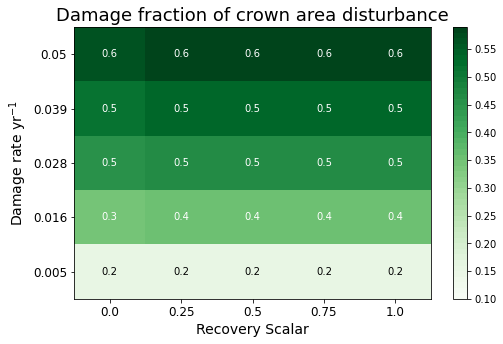

In [22]:
### Fig. S10
fig2, ((f2ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

test = np.linspace(1,6,6)
damage_carea_frac = np.zeros((nensemble))
damage_carea = np.zeros((nensemble))

for j in range(0,nensemble):
    carea_m = N_CAREA_M[j,:,:]
    carea_m = np.reshape(carea_m, (500, 12))
    carea_m_yr = np.mean(carea_m, axis = 1)
    carea_d = N_CAREA_D[j,:,:]    
    carea_d = np.reshape(carea_d, (500, 12))
    carea_d_yr = np.mean(carea_d, axis = 1)
    damage_carea[j] = np.mean(carea_d_yr, axis=0)
    damage_carea_frac_yr = carea_d_yr/(carea_d_yr + carea_m_yr)
    damage_carea_frac[j] = np.mean(damage_carea_frac_yr[400:], axis=0)
    
damage_carea_frac = np.reshape(damage_carea_frac, (n_damage_frac, n_damage_recovery_scalar))
damage_carea = np.reshape(damage_carea, (n_damage_frac, n_damage_recovery_scalar))

levels = np.arange(0.1, 0.6, 0.01)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f2ax0.pcolormesh(test, test, damage_carea_frac[:,:].transpose(), 
                      cmap=cmap, norm=norm)

fig2.colorbar(im, ax=f2ax0)    
f2ax0.set_title(r'Damage fraction of crown area disturbance', fontsize = 18)
f2ax0.set_xlabel('Recovery Scalar', fontsize = 14)
f2ax0.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f2ax0.tick_params(labelsize=12)
f2ax0.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f2ax0.set_xticklabels(labs)
f2ax0.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f2ax0.set_yticklabels(labs)

for i in range(len(damage_frac)):
    for j in range(len(damage_recovery_scalar)):
        if(i == 0): 
            color = 'black'
        else : 
            color = 'white'
               
                
        text = f2ax0.text(test[j]+0.5, test[i]+0.5, np.round(damage_carea_frac.transpose()[i, j], 1),
                       ha="center", va="center", color=color)

plt.savefig("Figures_v3/Damage_frac_recovery_scalar_heatmatp.png", format = 'png', dpi = 300)
    

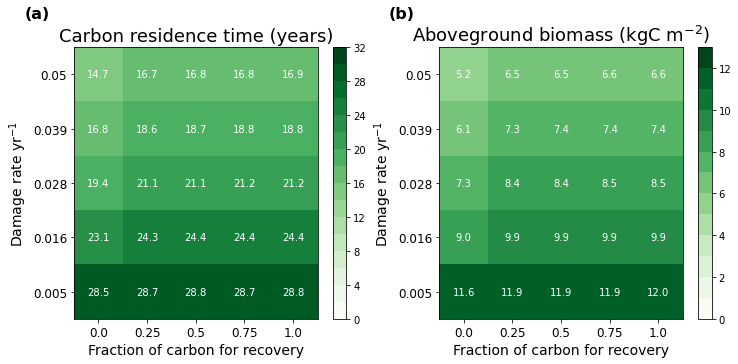

In [23]:
### Fig. S11

fig7, ((f7ax0, f7ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(12,5))

test = np.linspace(1,6,6)

cres_ensemble = np.zeros((nensemble))
agb_ensemble = np.zeros((nensemble))

for j in range(0,nensemble):
    cveg = np.squeeze(N_BIOMASS[j,:])/1000
    npp = np.sum(np.squeeze(N_NPP_SCPF[j,:,:,:]), axis=1)
    cres = cveg/npp
    cres_ensemble[j] = np.mean(cres[4800:], axis=0)
    agb = np.sum(N_AGB_SCLS[j,:,:,:], axis=1)
    agb_ensemble[j] = np.mean(agb[4800:], axis=0)
    
cres_ensemble = np.reshape(cres_ensemble, (n_damage_frac, n_damage_recovery_scalar))
agb_ensemble = np.reshape(agb_ensemble, (n_damage_frac, n_damage_recovery_scalar))

levels = np.arange(0, 34, 2)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(test, test, cres_ensemble[:,:].transpose(), 
                      cmap=cmap, norm=norm)
fig7.colorbar(im, ax=f7ax0)    
f7ax0.set_title(r'Carbon residence time (years)', fontsize = 18)
f7ax0.set_xlabel('Fraction of carbon for recovery', fontsize = 14)
f7ax0.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f7ax0.tick_params(labelsize=12)
f7ax0.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f7ax0.set_xticklabels(labs)
f7ax0.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f7ax0.set_yticklabels(labs)

for i in range(len(damage_frac)):
    for j in range(len(damage_recovery_scalar)):  
        text = f7ax0.text(test[j]+0.5, test[i]+0.5, np.round(cres_ensemble.transpose()[i, j], 1),
                       ha="center", va="center", color='white')

f7ax0.text(-0.1, 1.15, '(a)', transform=f7ax0.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')        
levels = np.arange(0, 14, 1)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax1.pcolormesh(test, test, agb_ensemble[:,:].transpose(), 
                      cmap=cmap, norm=norm)
fig7.colorbar(im, ax=f7ax1)    
f7ax1.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f7ax1.set_xlabel('Fraction of carbon for recovery', fontsize = 14)
f7ax1.set_ylabel(r'Damage rate yr$^{-1}$', fontsize = 14)
f7ax1.tick_params(labelsize=12)
f7ax1.set_xticks(test[0:5]+0.5)
labs = np.round(damage_recovery_scalar,3)
f7ax1.set_xticklabels(labs)
f7ax1.set_yticks(test[0:5]+0.5)
labs = np.round(damage_frac,3)
f7ax1.set_yticklabels(labs)

for i in range(len(damage_frac)):
    for j in range(len(damage_recovery_scalar)):  
        text = f7ax1.text(test[j]+0.5, test[i]+0.5, np.round(agb_ensemble.transpose()[i, j], 1),
                       ha="center", va="center", color='white')
        
f7ax1.text(-0.1, 1.15, '(b)', transform=f7ax1.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')        
        
plt.savefig("Figures_v3/CRES_Damage_frac_recovery_scalar_heatmatp.png", format = 'png', dpi = 300)
    

In [24]:
filename_in = 'V3/low_root_N_damage_mort_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v3d_time = fin.variables['time'][:] / 365.
v3dmdntime = len(v3d_time)

v3_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v3_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v3_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v3_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v3_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v3_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v3_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v3_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

fin.close()

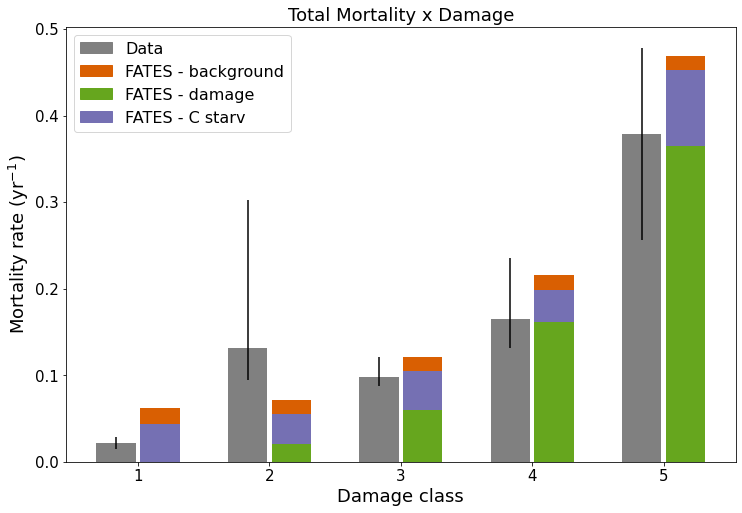

In [25]:
### Fig. S11
v3npl = np.delete(np.reshape(np.squeeze(v3_NPLANT_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)  
v3tot_mort = np.delete(np.reshape(np.squeeze(v3_MORTALITY_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3tot_prop = np.sum(v3tot_mort[4800:,:,:],axis=(0,2))/np.sum(v3npl[4800:,:,:],axis=(0,2))

v3m11_mort = np.delete(np.reshape(np.squeeze(v3_M11_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3m11_prop = np.sum(v3m11_mort[4800:,:,:],axis=(0,2))/np.sum(v3npl[4800:,:,:],axis=(0,2))

v3m3_mort = np.delete(np.reshape(np.squeeze(v3_M3_CDSC), (dmdntime, ndamagebins, nsizebins)), 0, 2)
v3m3_prop = np.sum(v3m3_mort[4800:,:,:],axis=(0,2))/np.sum(v3npl[4800:,:,:],axis=(0,2))


### BCI - mortality by damage class    
with open("r_mort_by_damage.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    next(reader, None)  # skip the headers
    data_read = [row for row in reader]

data_read = [float(x[1]) for x in data_read]
data_read = np.array(data_read)


### open error bars
res = np.loadtxt(open('r_mort_by_damage_by_cens.csv', 'rb'), delimiter=',', skiprows=1)
res = np.delete(res, 0, 1)

mini = data_read - np.min(res, axis=0)
maxi = np.max(res, axis=0) - data_read
yer = np.hstack((mini, maxi))
yer = np.reshape(yer, (2, 5))

ind = np.arange((ndamagebins*2)+4)
ind = np.delete(ind, (2, 5, 8, 11))

width = 0.9
  
fig6, ((f6ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(12,8))

f6ax0.bar(ind[::2], data_read, width, color='grey', yerr = yer)
f6ax0.bar(ind[::2]+1, v3tot_prop, width, color=colormap[1])
f6ax0.bar(ind[::2]+1, v3m11_prop, width, color=colormap[4])
f6ax0.bar(ind[::2]+1, v3m3_prop, bottom = v3m11_prop, width = width, color=colormap[2])

f6ax0.set_ylabel(r'Mortality rate (yr$^{-1}$)', fontsize=18)
f6ax0.set_xlabel('Damage class', fontsize=18)
f6ax0.set_title('Total Mortality x Damage', fontsize=18)
f6ax0.set_xticks(ind[::2]+0.5)
f6ax0.tick_params(labelsize=15)
f6ax0.set_xticklabels(['1', '2', '3', '4', '5'])


colors = {'Data':'grey', 'FATES - background':colormap[1], 'FATES - damage':colormap[4], 'FATES - C starv':colormap[2]}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ledg = plt.legend(handles, labels, loc='upper left', prop={'size':16})

plt.savefig("Figures_v3/mort_v_bci_old.png", format = 'png', dpi = 300)